<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20K-NN%20-%20CNN%20for%2010%20class%20classifications%20based%20on%20UNSW-NB15%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hybrid K-NN - CNN for 10 class classifications based on UNSW-NB15 dataset**

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
dataset = pd.read_csv("dataset_P2.2.csv")
dataset.shape
dataset.isnull().sum()
dataset.info()
dataset["Class"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

array([0, 2, 1, 5, 8, 7, 4, 3, 9, 6])

**Data preprocessing**

In [3]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'], axis=1)
X = X.values

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Data balancing using SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [5]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**K-NN Model**

In [6]:
# Train the K-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)

# Obtain predictions from the K-NN classifier
knn_pred = knn_model.predict(X_test)

**CNN Model**

In [23]:
from keras.utils import to_categorical
from keras.layers import Conv1D, Flatten

# Reshape the input data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert class labels to categorical representation
num_classes = len(np.unique(y))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Train the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(Flatten())
cnn_model.add(Dense(num_classes, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_categorical, epochs=10, batch_size=64)

# Obtain predictions from the CNN model
cnn_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

Epoch 1/10
7000/7000 [==============================] - 37s 5ms/step - loss: 1806772.7500 - accuracy: 0.2250
Epoch 2/10
7000/7000 [==============================] - 36s 5ms/step - loss: 42246.4531 - accuracy: 0.3179
Epoch 3/10
7000/7000 [==============================] - 35s 5ms/step - loss: 24.8620 - accuracy: 0.5686
Epoch 4/10
7000/7000 [==============================] - 36s 5ms/step - loss: 1.5942 - accuracy: 0.6321
Epoch 5/10
7000/7000 [==============================] - 37s 5ms/step - loss: 365.2654 - accuracy: 0.6284
Epoch 6/10
7000/7000 [==============================] - 39s 6ms/step - loss: 423.2373 - accuracy: 0.6386
Epoch 7/10
7000/7000 [==============================] - 37s 5ms/step - loss: 4.0125 - accuracy: 0.6511
Epoch 8/10
7000/7000 [==============================] - 36s 5ms/step - loss: 48.4602 - accuracy: 0.6558
Epoch 9/10
7000/7000 [==============================] - 35s 5ms/step - loss: 0.9138 - accuracy: 0.6593
Epoch 10/10
3500/3500 [==============================] - 

In [24]:
# Combine predictions from K-NN and LSTM models
hybrid_pred = np.where(knn_pred == cnn_pred, knn_pred, -1)  # Replace non-matching predictions with -1

# Final prediction using the majority vote
final_pred = np.where(hybrid_pred == -1, knn_pred, hybrid_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, final_pred)
print("Hybrid Model Accuracy:", accuracy)

Hybrid Model Accuracy: 0.6606607142857143


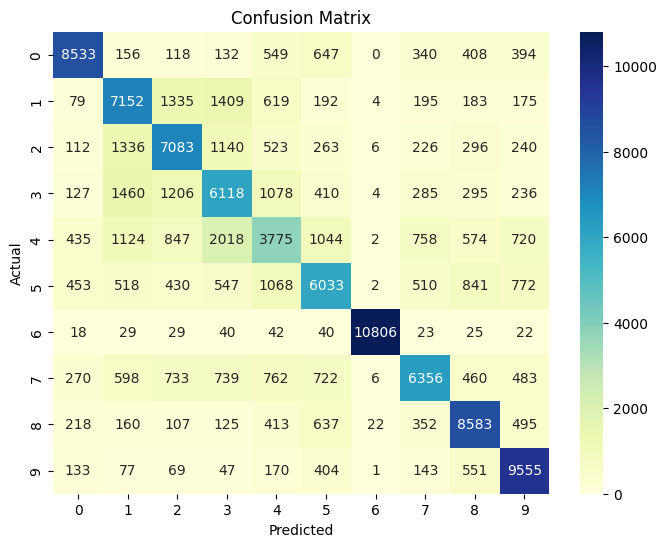

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, final_pred)

# Get the class labels
class_labels = np.unique(y_test)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(8,6.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  ax.yaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])

  plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

In [26]:
print("Confusion Matrix of Hybrid KNN-DNN Model") 
confusion_matrix(y_test, final_pred)

Confusion Matrix of Hybrid KNN-DNN Model


array([[ 8533,   156,   118,   132,   549,   647,     0,   340,   408,
          394],
       [   79,  7152,  1335,  1409,   619,   192,     4,   195,   183,
          175],
       [  112,  1336,  7083,  1140,   523,   263,     6,   226,   296,
          240],
       [  127,  1460,  1206,  6118,  1078,   410,     4,   285,   295,
          236],
       [  435,  1124,   847,  2018,  3775,  1044,     2,   758,   574,
          720],
       [  453,   518,   430,   547,  1068,  6033,     2,   510,   841,
          772],
       [   18,    29,    29,    40,    42,    40, 10806,    23,    25,
           22],
       [  270,   598,   733,   739,   762,   722,     6,  6356,   460,
          483],
       [  218,   160,   107,   125,   413,   637,    22,   352,  8583,
          495],
       [  133,    77,    69,    47,   170,   404,     1,   143,   551,
         9555]])